# **Laboratorio 5: Una introducción a la optimización**
**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2440** Programación científica

**Nombres de los integrantes**


1.   Paola Andrea Campiño
2.   Isabella Contreras Doria

**Número del grupo**

*Grupo 5*


#**1. Paquete optimize de scipy**

El paquete optimize de scipy posee distintas herramientas que permiten minimizar funciones. Una de las funciones más útiles del paquete optimize es *minimize*, que permite minimizar funciones escalares de una o más variables. A continuación se describen los argumentos de la función para su funcionamiento y se da un ejemplo de cálculo de minimizadores usando *minimize*.

En primer lugar, se importa la función minimize del paquete optimize de scipy

In [ ]:
from scipy.optimize import minimize

La función minimize recibe como argumentos lo siguiente:

**Argumentos obligatorios:**

- fun: la función que se desea minimizar. Por ejemplo, si se desea minimizar una función de 3 variables, la función no debe recibir 3 argumentos, sino un solo argumento X que es un array de 3 posiciones, donde cada posición corresponde a cada una de las variables. Es decir:

  Forma incorrecta:

  ```
  def funcion (x,y,z):
    return x + y + z
  ```
  Forma correcta:

  ```
  def funcion(X):
    x,y,z = X
    return x + y + z
  ```

- X0: un array de n elementos donde n es el número de variables de la función y que corresponde a las condiciones iniciales de cada variable.

**Argumentos opcionales:**

- args: Una tupla de elementos donde cada elemento corresponde a los parámetros adicionales de la función. Por ejemplo, si se tiene una función que recibe 3 variables y un parámetro p, la definición correcta de la función debería ser:

  ```
  def funcion(X, p):
    x,y,z = X
    return x*p + y + z
  ```

  Y en este caso, al invocar la función *minimize* se debería incluir el argumento args como una tupla de 1 posición, donde el valor corresponde al valor del parámetro p. Asumiendo que p tiene un valor de 0.2, se debería cumplir lo siguiente:

  ```
  argumentos = (0.2,)
  resultado = minimize(funcion, args = argumentos)
  ```

- bounds: Los límites de cada uno de los parámetros representados como una lista de tuplas, donde la lista tiene longitud *n* siendo n el número de variables de la función y cada tupla debe tener dos elementos de la siguiente manera: *(min, max)* y que corresponden al mínimo y máximo de cada variable. Si se coloca None en alguno de los parámetros min o max se asume que el parámetro no tiene límite inferior o superior dependiendo del caso. Por ejemplo:

  Se tiene una función *f* de 3 variables, donde la primera variable debe estar en el rango (10,20), la segunda variable debe ser mayor a 0 y la tercera variable debe ser menor a 10.

  En este caso, el código correcto para definir los límites de las variables es el siguiente:

  ```
  limites = [(10,20),(0,None),(None,10)]
  resultado = minimize(funcion, bounds = limites)
  ```

- constraints: Las restricciones que se tienen sobre las variables en forma de lista de diccionarios, donde cada elemento corresponde a cada una de las restricciones. Por ejemplo:

  Asuma que se tiene un problema de optimización con una función de 3 variables y la siguiente restricción:

  \begin{align}
  4 x_1 + 3 x_2 - x_3 >= 4
  \end{align}

  La restricción se debe definir como una función aplicable sobre las variables y que siempre debe retornar el resultado de la función igualada a 0. En este caso, la función de restricción debería ser:

  ```
  def restriccion_1(X):
      x_1, x_2, x_3 = X
      return 4*x_1 + 3*x_2 - x_3 - 4
  ```

  Note que en la función se resta 4 a la condición original para garantizar que la restricción esté igualada a 0.

  Una vez definida la función de restricción, se debe armar un diccionario con al menos 2 llaves: *type*, que puede tener valores "eq" o "ineq" y define si la restricción es una igualdad ($x_1 + x_2 = 0$) o una desigualdad ($x_1 + x_2 <= 0$); en caso de que la restricción sea una desigualdad, esta siempre debe ser expresada en la forma menor o igual a "<=".

  Como segunda llave se tiene *fun*, y su valor es la función que define la restricción. En el caso de la función *restriccion_1*, definida anteriormente, el diccionario que se debe armar para poder incluirla debe ser el siguiente:

  ```
  rest1 = {"type":"ineq","fun":restriccion_1}
  ```
  Por último, cada una de las restricciones (diccionarios) debe ser colocada en una lista e ingresada como parámetro *constrains*.








**Retorno:**

La función minimize retorna un diccionario con llaves *success* (booleano que indica si la solución pudo se hallada o no), *message* (mensaje que describe la causa de terminación de la ejecución del algoritmo) y *x* (array que contiene la solución).

#**Ejemplo de uso de la función**

Asuma que se quiere minimizar la función $y = 3(x_1 - 10)^2 + 4(x_2 - 5)^2$ sujeto a la condición $x_1^2+x_2^2 <= 9$ con $x_1 >= 1$ y $x_2 >= 2$.

In [ ]:
#En primer lugar, importamos las funciones necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
#Ahora, definimos la función de costo a minimizar
def f_costo(X):
  return 3*(X[0] - 10)**2 + 4*(X[1] - 5)**2

In [ ]:
#Definimos las restricciones y límites en el formato necesario para minimize
def f_restriccion(X):
  return 9 - X[0] ** 2 - X[1]**2

constraints = [{"type":"ineq","fun":f_restriccion},]
boundaries = [(1, None),(2, None)]

#Definimos las condiciones iniciales que queremos aplicar

x0 = [5,5]

In [ ]:
#Calculamos el resultado con la función minimize
res = minimize(f_costo,x0, bounds=boundaries, constraints=constraints)

In [ ]:
print(res)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 216.83592130158132
       x: [ 2.236e+00  2.000e+00]
     nit: 7
     jac: [-4.658e+01 -2.400e+01]
    nfev: 22
    njev: 7


In [ ]:
#Extraemos el resultado (parámetro x de la solución)
minimizador = res["x"]
print(f"El minimizador encontrado es: {minimizador}")

El minimizador encontrado es: [2.23606798 2.        ]


#**1.1 Ejercicios**

**1.** Grafique el área donde se requiere buscar el minimizador. Es decir, grafique la condición $x_1^2+x_2^2 <= 3$ e incorpore los límites $x_1 >= 1$ y $x_2 >= 2$.

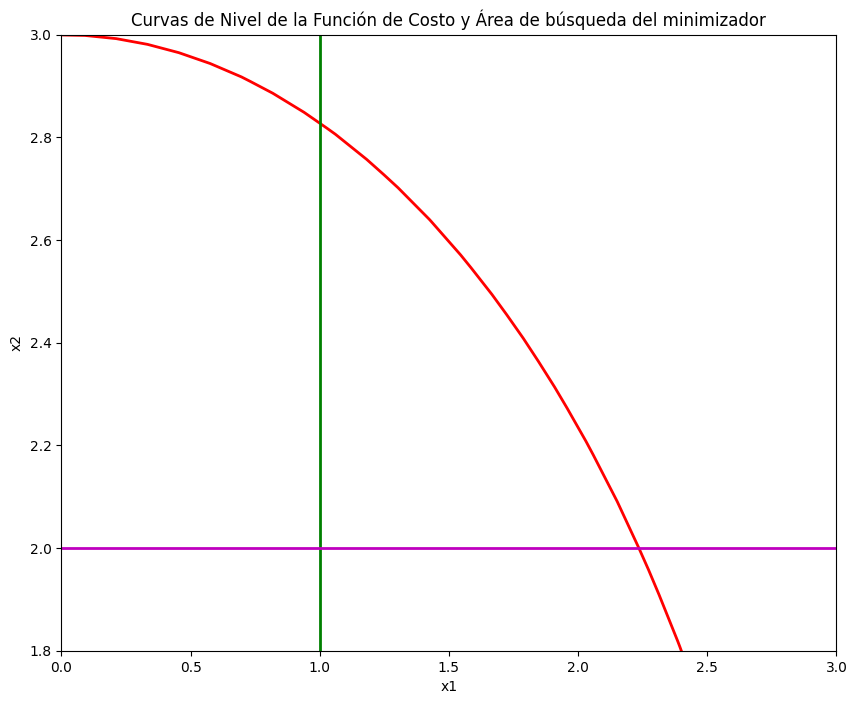

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x1, x2):
    return 3 * (x1 - 10)**2 + 4 * (x2 - 5)**2

def constraint1(x1, x2):
    return x1**2 + x2**2 - 9

def constraint2(x1):
    return x1 - 1

def constraint3(x2):
    return x2 - 2

x1_values = np.linspace(-1, 11, 100)
x2_values = np.linspace(-1, 8, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

Y = objective_function(X1, X2)
C1 = constraint1(X1, X2)
C2 = constraint2(X1)
C3 = constraint3(X2)

plt.figure(figsize=(10, 8))
plt.contour(X1, X2, C1, levels=[0], colors='r', linewidths=2)
plt.contour(X1, X2, C2, levels=[0], colors='g', linewidths=2)
plt.contour(X1, X2, C3, levels=[0], colors='m', linewidths=2)



plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de Nivel de la Función de Costo y Área de búsqueda del minimizador')

plt.xlim(0, 3)
plt.ylim(1.8, 3)


plt.show()

**2.** Grafique curvas de nivel para la función de costo.

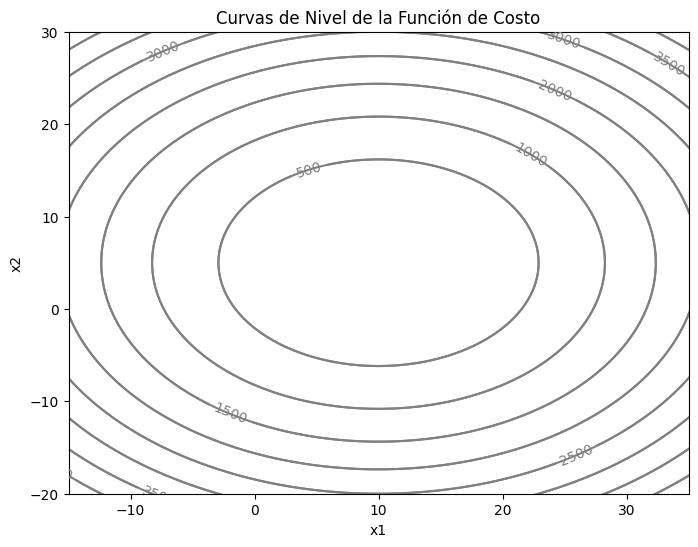

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def costo(x1, x2):
    return 3 * (x1 - 10)**2 + 4 * (x2 - 5)**2
x1 = np.linspace(-30, 40, 400)
x2 = np.linspace(-30, 30, 400)
X1, X2 = np.meshgrid(x1, x2)
Y = costo(X1, X2)
restriccion = X1**2 + X2**2 <= 9
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Y, levels=20, colors='gray')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de Nivel de la Función de Costo')
plt.xlim(-15, 35)
plt.ylim(-20, 30)
C = plt.contour(X1, X2, Y, levels=20, colors='gray')
plt.clabel(C, inline=1, fontsize=10)
plt.show()

**3.** En un mismo gráfico, grafique el área de interés donde se debe buscar el minimizador, las curvas de nivel de la función de costo y el mínimo que calculó la función minimize.

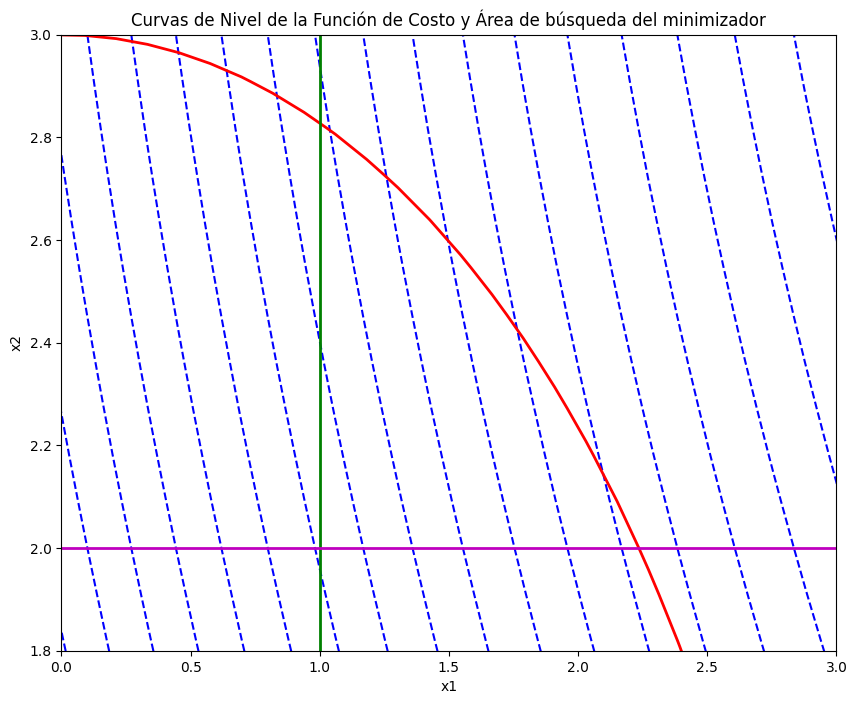

In [ ]:


x1_values = np.linspace(-1, 11, 100)
x2_values = np.linspace(-1, 8, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

Y = objective_function(X1, X2)
C1 = constraint1(X1, X2)
C2 = constraint2(X1)
C3 = constraint3(X2)


plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Y, levels=50, colors='b', linestyles='dashed')
plt.contour(X1, X2, C1, levels=[0], colors='r', linewidths=2)
plt.contour(X1, X2, C2, levels=[0], colors='g', linewidths=2)
plt.contour(X1, X2, C3, levels=[0], colors='m', linewidths=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Curvas de Nivel de la Función de Costo y Área de búsqueda del minimizador')

plt.xlim(0, 3)
plt.ylim(1.8, 3)


plt.show()

**4.** Responda, ¿es este minimizador encontrado el mejor que tiene la función?, ¿Que pasaría si la condición fuera removida?

In [ ]:
El minimizador encontrado por la función minimize es el mejor minimizador dentro del área restringida por las condiciones definidas. Sin embargo, si la condición se eliminara, la situación cambiaría. En este caso, la función de costo no tendría restricciones adicionales, lo que significa que el minimizador no estaría limitado por el círculo de radio 3 centrado en el origen.

#**2. Resolución de un problema de optimización**

Considere el siguiente problema de optimización:

El Hospital Juan de Dios desea determinar cuál es el número de diagnósticos de los cuatro mostrados en la tabla, que le permitiría maximizar su utilidad. Para cada procedimiento se ha establecido el número de recursos (Horas de diagnóstico, días en camas UCI, cuidados de enfermería) que se requieren para cada diagnóstico, así como el margen de utilidad. Igualmente, se sabe que el hospital debe atender un mínimo número de casos en estos diagnósticos y la disponibilidad de los recursos. La tabla presenta esta información.

**NOTA:** Se asume que las variables son continuas.




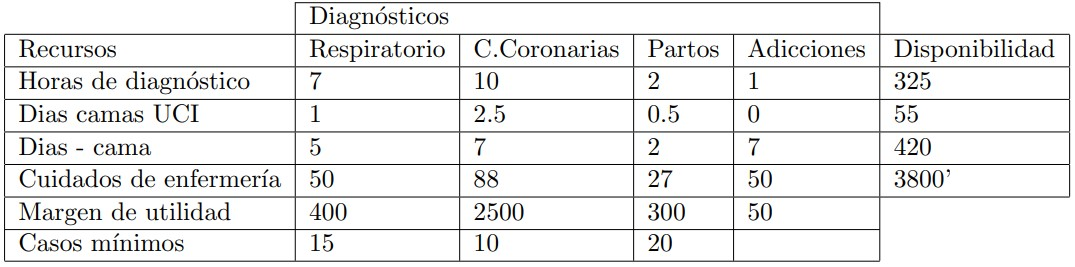

**2.1.** Ejercicios

**1.** Defina la función objetivo

In [ ]:
def funcion_objetivo(X):
  return -(400*X[0]+2500*X[1]+300*X[2]+50*X[3])

**2.** Defina las restricciones del problema en forma de funciones.

In [ ]:
def horas_diagnostico(X):
  return 325 - (7*X[0]+10*X[1]+2*X[2]+1*X[3])
def dias_uci(X):
  return 55 - (1*X[0]+2.5*X[1]+0.5*X[2]+0*X[3])
def dias_cama(X):
  return 420 - (5*X[0]+7*X[1]+2*X[2]+7*X[3])
def cuidados_enfermeria(X):
  return 3800 - (50*X[0]+88*X[1]+27*X[2]+50*X[3])




constraints = [{'type': 'ineq', 'fun': horas_diagnostico},
               {'type': 'ineq', 'fun': dias_uci},
               {'type': 'ineq', 'fun': dias_cama},
               {'type': 'ineq', 'fun': cuidados_enfermeria}]


**3.** Defina los límites para cada una de las variables (bounds)

In [ ]:
initial_guess = [15, 10, 20, 0]
boundaries = [(15, None),(10, None),(20, None),(0, None)]




```
# Tiene formato de código
```

**4.** Calcule el minimizador con la función *minimize*

In [ ]:

resultado = minimize(funcion_objetivo, initial_guess, constraints=constraints,bounds=boundaries)
print(resultado)


**5.** Imprima el minimizador, el mínimo y verifique que se cumplan cada una de las restricciones del problema.

In [ ]:
rounded_solution = [round(val, 2) for val in resultado.x]

print("Valor óptimo de las variables:", rounded_solution)
print("Valor óptimo de la función objetivo:", -resultado.fun)

**6.** Calcule la cantidad total de recursos usados a partir de la solución del problema. Tenga en cuenta las unidades de cada recurso.


In [ ]:
def print_recurso(solution):

    print("Diagnostico respiratorio: "+str(solution[0]))
    print("Diagnostico C.Coronarias: "+str(solution[1]))
    print("Diagnostico Partos: "+str(solution[2]))
    print("Diagnostico Addiciones "+str(solution[3]))
    print("\n")



def check(solution):
    print_recurso(solution)

    print("Para revisar que cada uno de los datos esté correcto se realizó una resta, \n en la que se verifica que el recurso disponible menos el recurso a usar \n sea positivo o igual  a 0 lo cual indicaría que la solución es correcta.\n")
    print("Diferencia Horas de diagnostico disponibles - horas de diagnostico: \n"+ str(horas_diagnostico(solution)))
    print("\n")
    print("Diferencia dias en uci disponibles - dias en uci: \n"+str(dias_uci(solution)))
    print("\n")

    print("Diferencia dias en cama disponibles - dias en cama: \n"+str(dias_cama(solution)))
    print("\n")

    print("Diferencia cuidados de enfermería disponibles - cuidados de enfermería: \n"+str(cuidados_enfermeria(solution)))

check(rounded_solution)

print()

**7.** Analice el minimizador y el mínimo obtenido en el enunciado 5. en el contexto del problema planteado. Por ejemplo, en este análisis puede incluir sus observaciones relacionadas con la cantidad de diagnósticos de cada tipo (por qué unos diagnósticos se prefieren realizar con más frecuencia que otros), la utilidad máxima obtenida, el uso total de cada uno de los recursos a partir de la cantidad de diagnósticos obtenidos (por qué unos recursos se usan más que otros), entre otros.


En base a los resultados que se han calculado anteriormente se ha llegado a notar que la solución más optima consisten en la siguiente cantidad por cada diagnostico:

- Diagnostico respiratorio: 15.0
- Diagnostico C.Coronarias: 12.0
- Diagnostico Partos: 20.0
- Diagnostico Addiciones: 29.08

Es así como llegariamos a un mayor margen de utilidad el cual sería de: 43,454 dolares (?) aproximadamente.

Algo que se puede notar es que se quiere realizar el diagnostico de Addiciones con más frecuencia ya que si bien este es que menos utilidad tiene es también el que menos recurso necesita.

Otro punto a notar es que en los calculos de ccoronarias se puede notar poco más del limite inferior de diagnostico, ya que es uno de los test que mayor margen de utilidad generan.

Cabe resaltar que al final de cuentas quedan horas de diagnostico disponibles con 30.92 horas y 17.43 dias en cama restantes, las unicas variables que quedan exactas serían dias en icu y cuidados de enfermería.


